# 라이브러리 호출

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# 로컬 컴퓨터에 저장되어 있는 경우 상위폴더에 dataset 폴더 형성 후 데이터를 집어 넣으면 됨
path = '../dataset/'

# 데이터 불러오기

In [2]:
# 로컬 컴퓨터에 저장되어 있는 경우
# data = pd.read_csv(path+'iris.csv')
# data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# 깃허브 업로드 파일 이용
data = pd.read_csv('https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# feature, target 분류
feature = data.drop(['target'], axis=1).values 
target = data['target'].values 

# 1. K-Means (군집분석)

     sepal_length  sepal_width  petal_length  petal_width  target  pred
0             5.1          3.5           1.4          0.2       0     0
1             4.9          3.0           1.4          0.2       0     0
2             4.7          3.2           1.3          0.2       0     0
3             4.6          3.1           1.5          0.2       0     0
4             5.0          3.6           1.4          0.2       0     0
..            ...          ...           ...          ...     ...   ...
145           6.7          3.0           5.2          2.3       2     2
146           6.3          2.5           5.0          1.9       2     1
147           6.5          3.0           5.2          2.0       2     2
148           6.2          3.4           5.4          2.3       2     2
149           5.9          3.0           5.1          1.8       2     1

[150 rows x 6 columns]


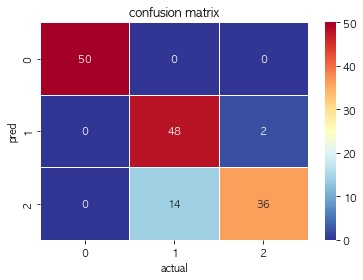

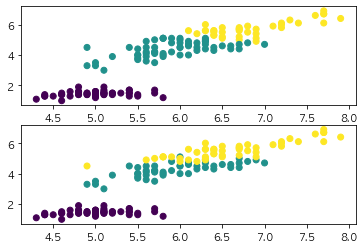

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

# k-means 알고리즘 (비지도학습이지만 cluster 개수를 알고 있는 경우)
model = KMeans(n_clusters=3, random_state=2022, algorithm='auto').fit(feature)

# 군집분석 결과
data['pred'] = model.predict(feature)
print(data)

# 혼동행렬로 실제, 예측값 표시
matrix = pd.DataFrame(confusion_matrix(y_pred = data['pred'], y_true = data['target']))

# 혼동행렬 시각화
sns.heatmap(matrix, cmap = 'RdYlBu_r', annot = True, annot_kws={"size": 10}, linewidths=.5)
plt.title('confusion matrix')
plt.xlabel('actual')
plt.ylabel('pred')
plt.show()

# 4. 군집결과 시각화 
plt.subplot(2,1,1)
plt.scatter(x=data['sepal_length'], y=data['petal_length'], c=data['pred'])
plt.subplot(2,1,2)
plt.scatter(x=data['sepal_length'], y=data['petal_length'], c=data['target']) 
plt.show()

In [6]:
data.columns.tolist()

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'target',
 'pred']

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


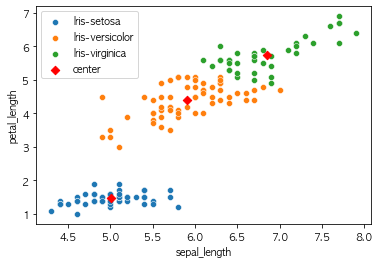

In [7]:
# center는 K-means에서 도출된 각 값에 대한 mean을 의미함.
centers = model.cluster_centers_ 
# 3 by 4로 구성된 행렬로 각 행은 cluster 별 mean을 의미하고 열은 feature 별 mean을 의미함.
print(centers)

# 시각화
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
    sns.scatterplot(x=data.loc[data['pred']==i]['sepal_length'], y=data.loc[data['pred']==i]['petal_length'], label=labels[i])
plt.scatter(x=centers[:,0], y=centers[:,2], marker='D', c='r', label='center') 
plt.legend()
plt.show()

In [8]:
# 함수화 작업
def k_means(data, N_cluster = 3, feature_num1=1, feature_num2=2):
    """_summary_

    Args:
        data (DataFrame): 해당 데이터의 컬럼은 컬럼명이 target인 컬럼이 존재해야 합니다.
        N_cluster (int): K-means를 수행하기 위한 클러스터 개수를 입력해야 합니다. 기본값은 3입니다.        
        feature_num1 (str): 2차원 그래프로 표현하기 위해 몇번째 feature를 입력할 것인지 기입해주세요. (기본값은 1번째 입니다.)
        feature_num2 (str): 2차원 그래프로 표현하기 위해 몇번째 feature를 입력할 것인지 기입해주세요. (기본값은 2번째 입니다.)
    """
    # 라이브러리 호출
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.cluster import KMeans
    from sklearn.metrics import confusion_matrix

    if feature_num1 != feature_num2:
        # feature, target 분류
        feature = data.drop(['target'], axis=1)
        target = data['target'].values 
        col_list = data.columns.tolist()
        
        # k-means 알고리즘 (비지도학습이지만 cluster 개수를 알고 있는 경우)
        model = KMeans(n_clusters=N_cluster, random_state=2022, algorithm='auto').fit(feature)

        # 군집분석 결과
        data['pred'] = model.predict(feature)

        # 혼동행렬로 실제, 예측값 표시
        matrix = pd.DataFrame(confusion_matrix(y_pred = data['pred'], y_true = data['target']))

        # 혼동행렬 시각화
        sns.heatmap(matrix, cmap = 'RdYlBu_r', annot = True, annot_kws={"size": 10}, linewidths=.5)
        plt.title('confusion matrix')
        plt.xlabel('actual')
        plt.ylabel('pred')
        plt.show()


        # 4. 군집결과 시각화 
        plt.subplot(2,1,1)
        plt.scatter(x=data[col_list[feature_num1]], y=data[col_list[feature_num2]], c=data['pred'])
        plt.ylabel(col_list[feature_num2])
        plt.title('Clustering output & actual data scatter')
        plt.subplot(2,1,2)
        plt.scatter(x=data[col_list[feature_num1]], y=data[col_list[feature_num2]], c=data['target'])
        plt.xlabel(col_list[feature_num1])
        plt.ylabel(col_list[feature_num2])
        plt.show()
        
        # 시각화
        for i in range(3):
            sns.scatterplot(x=data.loc[data['pred']==i][col_list[feature_num1]], y=data.loc[data['pred']==i][col_list[feature_num2]], label=f'target number {i}')
        # center는 K-means에서 도출된 각 값에 대한 mean을 의미함.
        plt.scatter(x=model.cluster_centers_ [:,feature_num1], y=model.cluster_centers_ [:,feature_num2], marker='D', c='r', label='center') 
        plt.xlabel(col_list[feature_num1])
        plt.ylabel(col_list[feature_num2])
        plt.title('each cluster and centroid')
        plt.legend(bbox_to_anchor=(1.0, 1.0))
        plt.show()
    else:
        print(f'{feature_num1}번째 feature와 {feature_num2}번째 feature가 같습니다.')
        print('몇번째 feature를 설정할 때는 다른 값을 입력해주세요.')


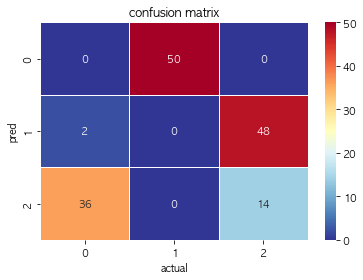

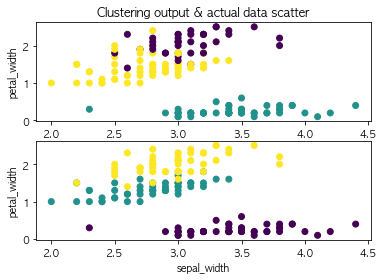

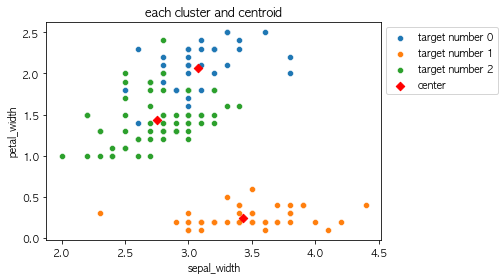

In [9]:
k_means(data, 3, 1, 3)